## Multiple Linear Regression and Regression Error Metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Advertising.csv")
df.sample(5)

,TV,radio,newspaper,sales
186,139.5,2.1,26.6,10.3
66,31.5,24.6,2.2,9.5
128,220.3,49.0,3.2,24.7
143,104.6,5.7,34.4,10.4
84,213.5,43.0,33.8,21.7


In [3]:
df.shape

(200, 4)

In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df.sort_values(by = "sales", ascending= False).head()

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
print(np.mean([100, 110, 120, 115]))  #outlier yok 
print(np.std([100, 110, 120, 115]))   #standart sapma ortalamaya yaklaşırsa outlier var

111.25
7.39509972887452


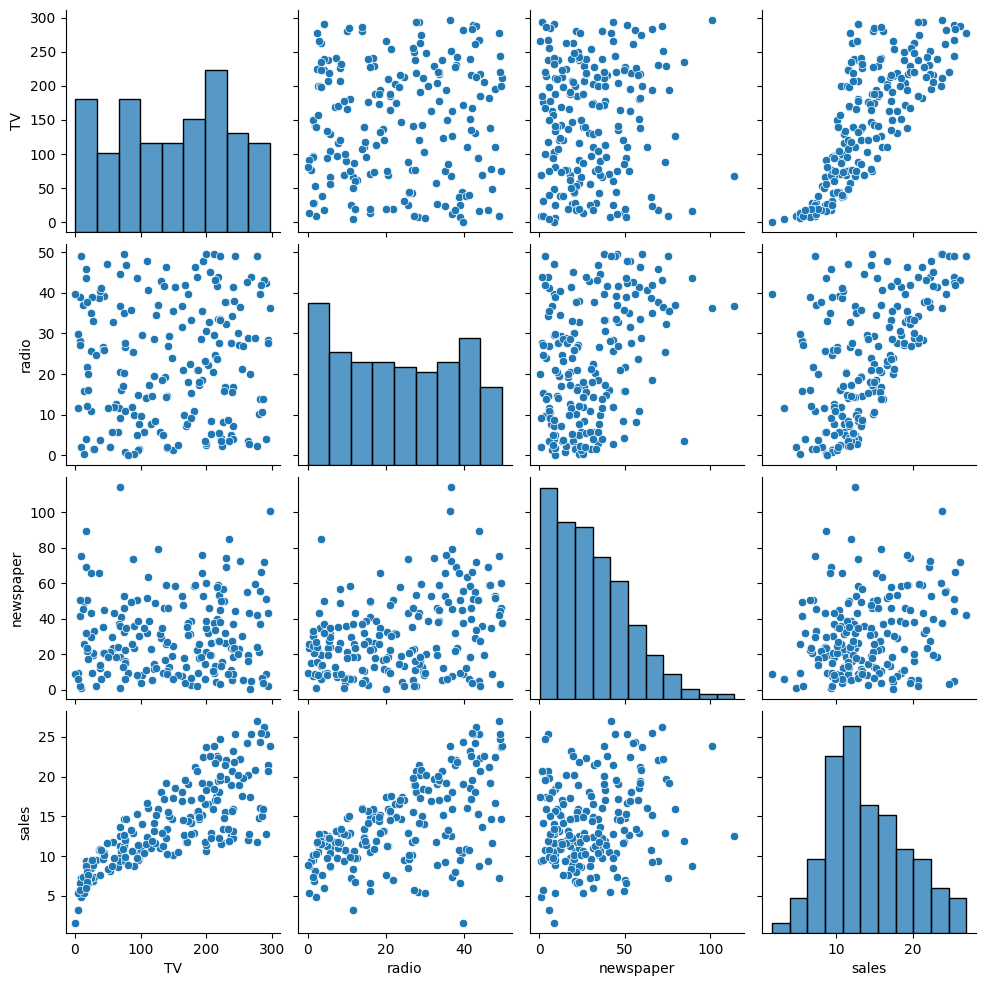

In [8]:
sns.pairplot(df);

<Axes: >

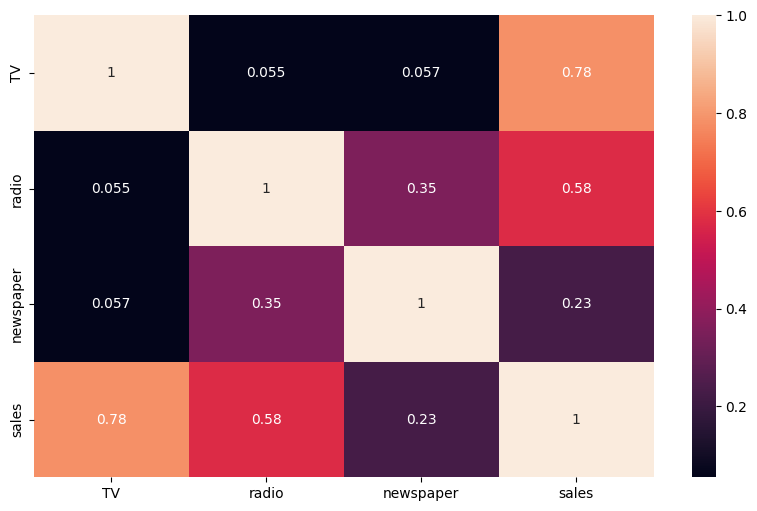

In [9]:
sns.heatmap(df.corr(), annot = True)

In [10]:
from scipy.stats import skew

In [11]:
##Pearson coefficient correlation  simmetrik = mod = medyan = arifmetik ortalama
## sağa çarpık x(arifmetik ortalama) > medyan > mod
## sola çarpık x < medyan <mod

In [12]:
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


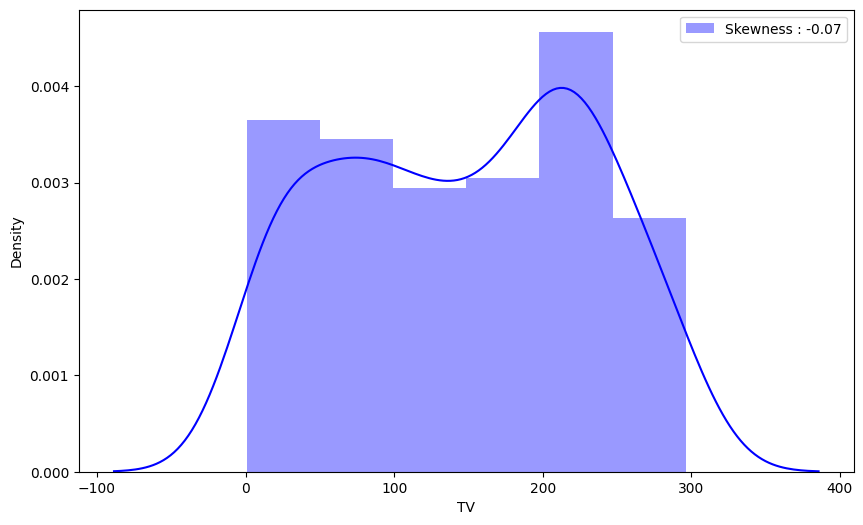

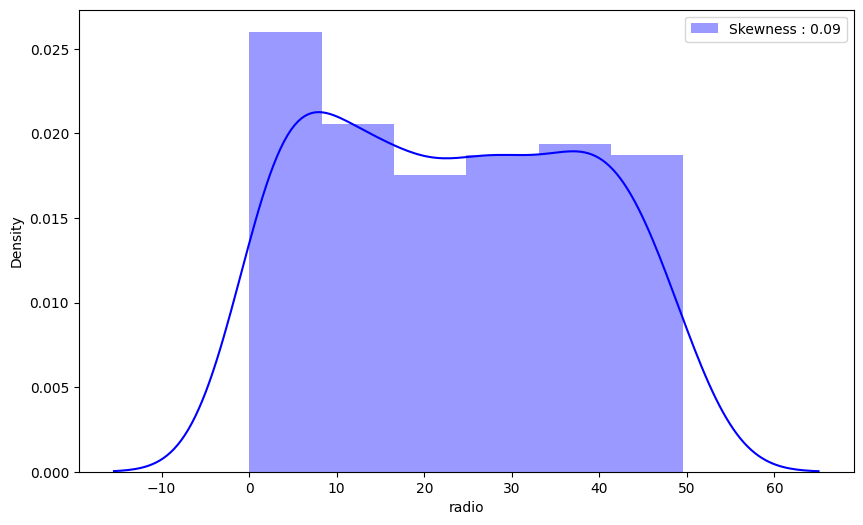

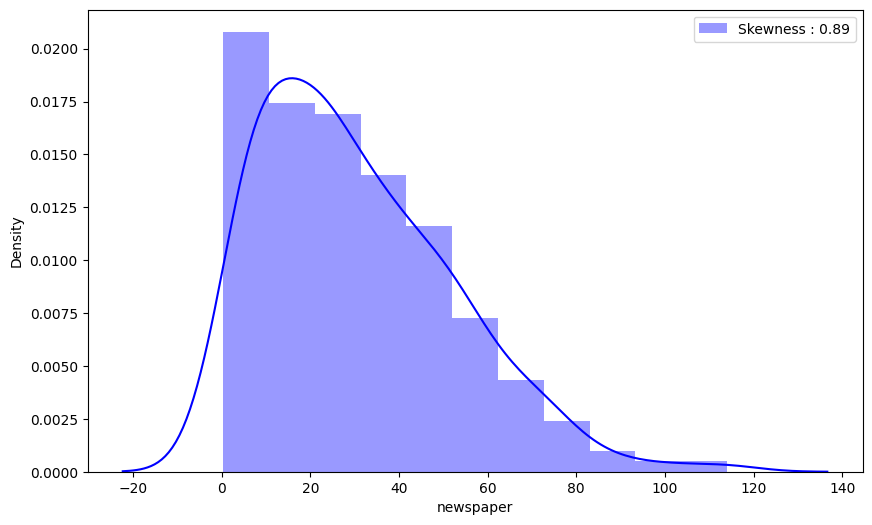

In [13]:
for j in df.drop(columns = "sales").columns:
    g = sns.distplot(df[j], color = "b", label = "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc = "best")
    plt.show()

In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Train - Test Split

Datamız 1000'e kadar ise %30-20 test %70-80 train

Datamız 1000-100.000 ise %10-20 test , %80-90 train

Datamız 100.000- 1.000.000 ise %5 tets, %95 train

Datamız 1.000.000 büyük ise %1 test, %99 test

En düşük oran ise %30 test, %70 train olabilir. Train datasının fazla olması önemlidir.

In [15]:
X = df.drop(columns = "sales")

y = df["sales"]

print(X, y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42)

In [18]:
df.sample(20)

,TV,radio,newspaper,sales
20,218.4,27.7,53.4,18.0
194,149.7,35.6,6.0,17.3
57,136.2,19.2,16.6,13.2
189,18.7,12.1,23.4,6.7
195,38.2,3.7,13.8,7.6
188,286.0,13.9,3.7,15.9
167,206.8,5.2,19.4,12.2
53,182.6,46.2,58.7,21.2
113,209.6,20.6,10.7,15.9
91,28.6,1.5,33.0,7.3


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
print("X train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
     (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)


In [21]:
model = LinearRegression()

### Model Fit 

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [24]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [25]:
model.intercept_ #intercept

2.7089490925159083

In [26]:
# y_pred = b1*TV + b2*radio + b3*newspaper + b0

In [27]:
sum(X_test.loc[95]* model.coef_) + model.intercept_ #manual

16.56539629743484

In [28]:
my_dict = {"actual":y_test, "pred": y_pred, "residual": y_test-y_pred}

In [29]:
comparing = pd.DataFrame(my_dict)
comparing

,actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [30]:
result_sample = comparing.sample(25)

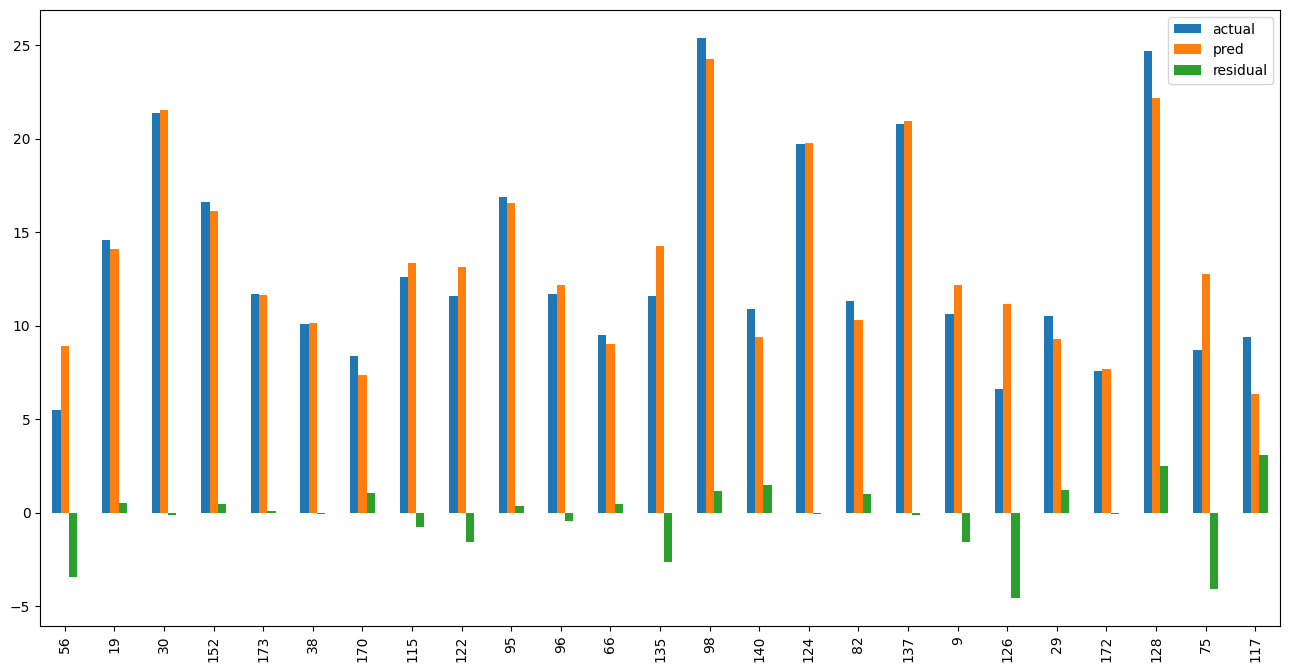

In [31]:
result_sample.plot(kind = "bar", figsize =(16,8))
plt.show()

## ErrorMetrics

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
r2_score = r2_score(y_test, y_pred)
r2_score    

0.8609466508230367

In [80]:
###r2_score ne açıklıyor ? eldeki featurelerle targetin %86 açıklayabiliyorum. 
             ### Target'i 100% tahmin edebilek için datanın %86 sahibiz, buna biraz daha feature ekleyebilseydik belki 100% TAHMİN EDEBİLİRDİK.
    ## mODELİN NE KADAR BAŞARILI OLDUĞUNU R2 SCORE İLE GÖSTEREBİLİYORUZ.

In [81]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549089

In [82]:
mse = mean_squared_error(y_test, y_pred)
mse

3.7967972367152227

In [83]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446394

In [84]:
##mse ve mae arasında çok büyük fark varsa modelde hata vardır anlamına gelmektedir.


In [85]:
sales_mean = df["sales"].mean()
sales_mean

14.0225

In [86]:
mae / sales_mean     ## %10 hata oranı

0.10780311802138769

In [87]:
rmse / sales_mean    ##%13 hata oranı bu daha iyi sonuç veriyor çunkü en iyi hata oranını gösteriyor.

0.13895790367941802

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
##foncsiyonu tekrar çalıştırmak gerekiyor

## Adjusted R2 score (düzenlenmiş R2 score

In [109]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   
    p = df.shape[1]-1
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [110]:
adj_r2(y_test, y_pred, df)

0.8588182832335933

In [111]:
## feature eklerken her bir değişken için 30 gözlem eklemeiz lazım
## 300 satır ve 3 featuregetirdiyse 2*30 =90 tane satır getir dememiz gerekiyor.

### What is the concept of punishment for RMSE error metric?

In [112]:
variables = {"Actual" : [1000, 2000, 3000, 4000], "Pred": [1100, 2200, 3300, 4400] }
variables_2 = {"Actual" : [1000, 2000, 3000, 4000], "Pred": [1150, 2250, 3350, 4450] }

In [113]:
df_1 = pd.DataFrame(variables)
df_1

,Actual,Pred
0,1000,1100
1,2000,2200
2,3000,3300
3,4000,4400


In [114]:
df_2 = pd.DataFrame(variables_2)
df_2

,Actual,Pred
0,1000,1150
1,2000,2250
2,3000,3350
3,4000,4450


In [115]:
df_1["residual"] = abs(df_1.Actual-df_1.Pred)
df_1

,Actual,Pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3300,300
3,4000,4400,400


In [116]:
df_2["residual"] = abs(df_2.Actual-df_2.Pred)  ##abc mutlak değeri alır
df_2

,Actual,Pred,residual
0,1000,1150,150
1,2000,2250,250
2,3000,3350,350
3,4000,4450,450


In [117]:
df_1.residual.sum()/4  ##resiualeri toplam gözlem sayısına bölüyoryn

250.0

In [118]:
df_2.residual.sum()/4

300.0

In [119]:
(((df_1.residual**2).sum())/5)**0.5  ##rmse daha objektif sonuç veriyor çünkü
## datadan hata küçü olursa öne çkartmiyor ama büyük hatayıda öne çok iyi şekilde göst.

244.94897427831782

In [120]:
(((df_2.residual**2).sum())/5)**0.5

286.35642126552705

## Evaluation Model

In [121]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("-----------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [122]:
eval_metric(y_test, y_pred)

Model testing performance: 
-----------------------------
R2_score 	: 0.8609466508230367
MAE 		: 1.5116692224549089
MSE 		: 3.7967972367152227
RMSE 		: 1.9485372043446394


In [123]:
y_train_pred = model.predict(X_train)

In [124]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
-----------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072528
MSE 		: 2.479355178905786
RMSE 		: 1.574596830590544


In [125]:
## Yaptıgımız modelde test datası ve train datası yakınsa genelleme yapabiliyorudr.
## eger arada çok fark varsa overfitting vardır ve ezber yapıyorudr. ##bunun çözüüde var.

## Is data aviable for linear regression

In [126]:
residuals = y_test - y_pred

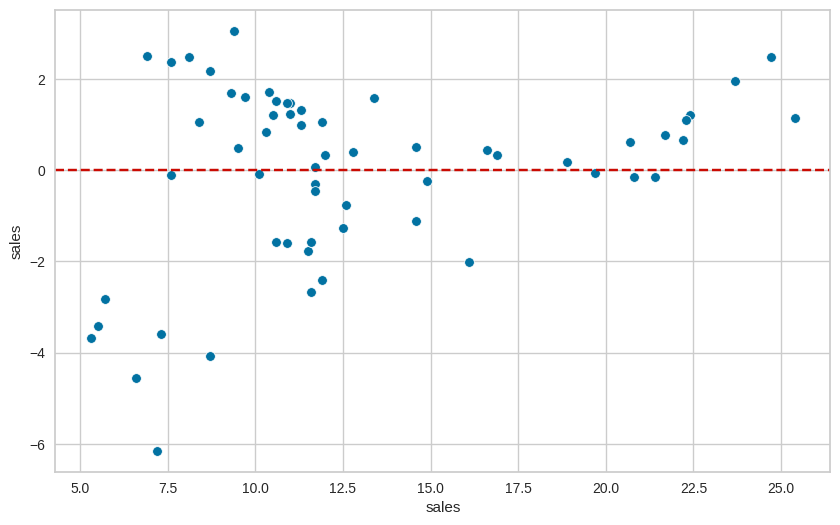

In [127]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = "r", linestyle="--")
plt.show()

In [128]:
## veriler çizginin etrafında normal dağılmışsa model başarılıdır.

<Axes: xlabel='sales', ylabel='Density'>

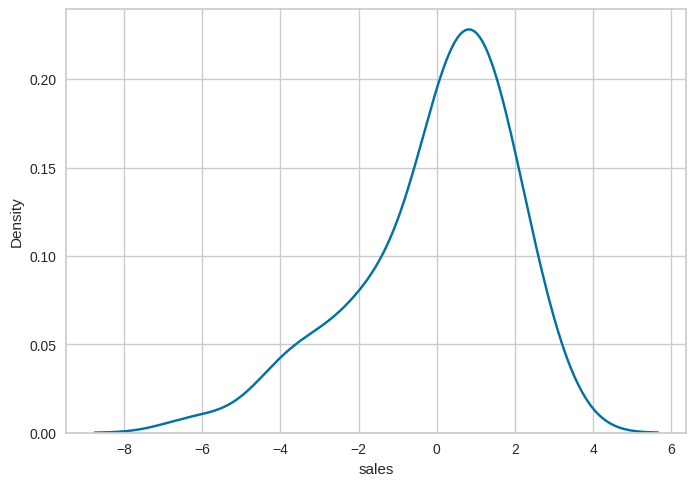

In [129]:
sns.kdeplot(residuals)

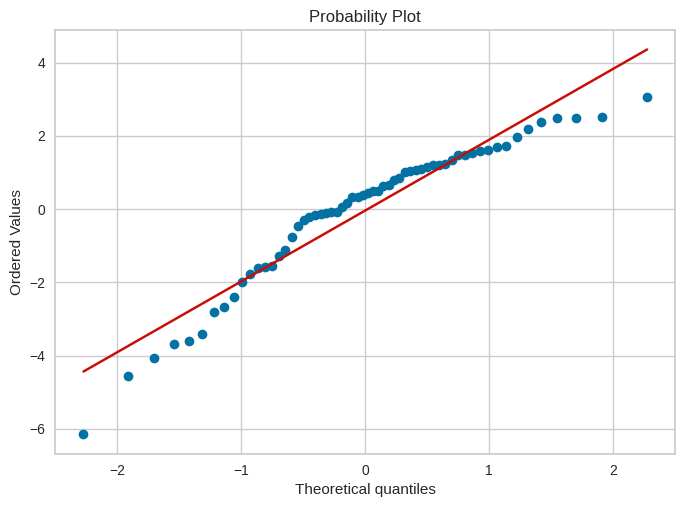

In [130]:
stats.probplot(residuals, dist = "norm", plot = plt);

In [131]:
##noktalar çizgiyle ne kadar iç içeyse o kadar normal dağılım vardır.

In [132]:
from scipy.stats import skew

In [133]:
skew(residuals)   #-1.5 +1.5 skewness important due to tabaşnik.
## basıklık değeride +1.5 ve -1.5 arası olması gerekiyor.

-0.9865673346742743

In [134]:
from yellowbrick.regressor import ResidualsPlot

##resiaualplot

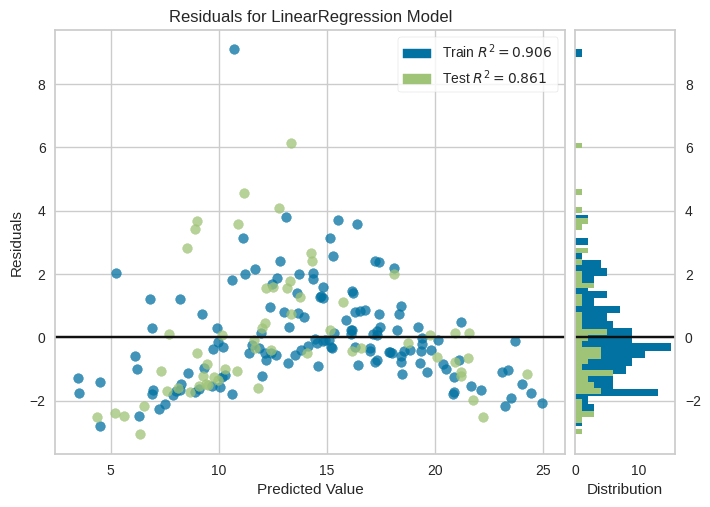

In [135]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [136]:
from yellowbrick.regressor import PredictionError

##resiaualplot

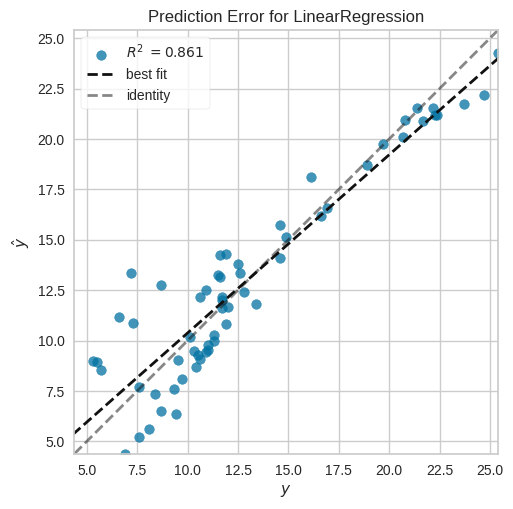

In [137]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [138]:
##çizgi
##model kaarar veremezseniz radakı açıya bakın, aralığın ne kadar yakın olması 

## Retraining Model on Full Data

In [139]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [140]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [141]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficients"])

In [142]:
coeff_df

,Coefficients
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [143]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [144]:
final_model.intercept_

2.938889369459412

In [145]:
tv = 150
radio = 20
newspaper = 15

In [146]:
adv = [[150, 20, 15]]
adv

[[150, 20, 15]]

In [148]:
final_model.predict(adv)

array([13.55862413])

In [150]:
adv2 = [[250, 20, 15]]
adv

[[250, 20, 15]]

In [151]:
final_model.predict(adv2)

array([18.13508868])

In [156]:
adv3 = [[200, 25, 10], [222, 38, 23]]
adv3

[[200, 25, 10], [222, 38, 23]]

In [157]:
final_model.predict(adv3)

array([16.79469395, 20.23891896])